# Alter the land mask around Greenland

Remove ocean section around the southeast side of Greenland, so that we only have a small boundary right at the tip of Greenland.

Date: Feb 19, 2021

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cmocean

%matplotlib inline

Parameters:

In [2]:
land_color = '#a9a7a2'
coastline_color = '#373736'

Load files:

In [3]:
ANHA12_mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')

nav_lon = np.array(ANHA12_mask.variables['nav_lon'])
nav_lat = np.array(ANHA12_mask.variables['nav_lat'])
tmask   = np.array(ANHA12_mask.variables['tmask'])[0,:,:,:]

Plot:

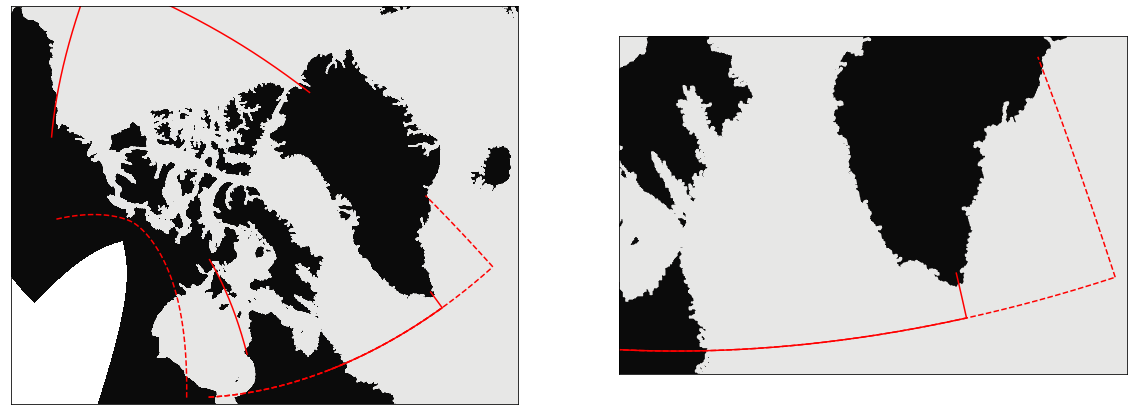

In [44]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1 = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.0e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)
proj1.contourf(x_model, y_model, tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj1.plot(x_model[1600:2180,799], y_model[1600:2180,799], '-r') # Northern Canada Basin
proj1.plot(x_model[2180,392:799] , y_model[2180,392:799] , '-r') # Western Canada Basin
proj1.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')  # Southeast Greenland 
proj1.plot(x_model[1100,202:680] , y_model[1100,202:680] ,'--r')  # Old Southern Baffin Bay
proj1.plot(x_model[1100,440:680] , y_model[1100,440:680] ,'-r')  # New Southern Baffin Bay  <-----
proj1.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r') # where the BC used to be
proj1.plot(x_model[1100,202:799] , y_model[1100,202:799] ,'--r') # where the BC used to be

proj1.plot(x_model[1100:2180,160] , y_model[1100:2180,160] ,'--r') # where the BC used to be
# proj1.plot(x_model[1280:1464,326] , y_model[1280:1464,326] ,'-r')  # new Hudson Bay BC option1 
proj1.plot(x_model[1190:1474,292] , y_model[1190:1474,292] ,'-r')  # new Hudson Bay BC option2   <-----

#--- zoom -----------
proj2 = Basemap(projection='stere',lat_0 = 63, lon_0 = -50, resolution='i', width=2.1e6, height=1.4e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.contourf(x_model, y_model, tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')
proj2.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r')
proj2.plot(x_model[1100,202:680] , y_model[1100,202:680],'-r')
proj2.plot(x_model[1100,202:799] , y_model[1100,202:799],'--r')

In [37]:
new_tmask = np.copy(tmask)
new_tmask[:,1100:1280,680:799] = 0
new_tmask[:,800:1480,80:292] = 0
# new_tmask[:,800:1480,80:326] = 0
new_tmask[:,1100:1200,160:320] = 0

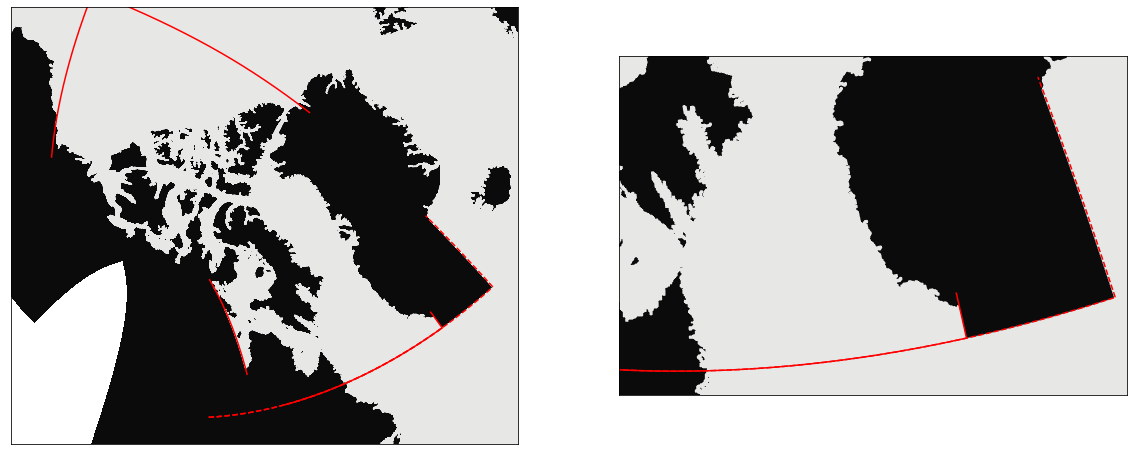

In [38]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1 = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.4e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)

proj1.contourf(x_model, y_model, new_tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj1.plot(x_model[1600:2180,799], y_model[1600:2180,799], '-r') # Northern Canada Basin
proj1.plot(x_model[2180,392:799] , y_model[2180,392:799] , '-r') # Western Canada Basin
proj1.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')  # Southeast Greenland 
proj1.plot(x_model[1100,202:680] , y_model[1100,202:680] ,'--r')  # Old Southern Baffin Bay
proj1.plot(x_model[1100,350:680] , y_model[1100,350:680] ,'-r')  # New Southern Baffin Bay  <-----
proj1.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r') # where the BC used to be
proj1.plot(x_model[1100,202:799] , y_model[1100,202:799] ,'--r') # where the BC used to be
proj1.plot(x_model[1190:1474,292] , y_model[1190:1474,292] ,'-r')  # new Hudson Bay BC option2   <-----

#--- zoom -----------
proj2 = Basemap(projection='stere',lat_0 = 63, lon_0 = -50, resolution='i', width=2.1e6, height=1.4e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.contourf(x_model, y_model, new_tmask[0,:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')
proj2.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r')
proj2.plot(x_model[1100,202:680] , y_model[1100,202:680],'-r')
proj2.plot(x_model[1100,202:799] , y_model[1100,202:799],'--r')

Write to file:

In [39]:
ANHA12_mask_new = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb.nc', 'r+')
ANHA12_mask_new['tmask'][0,:,:,:] = new_tmask
ANHA12_mask_new.close()

In [40]:
ANHA12_mask_new = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb.nc')
tmask_read = np.array(ANHA12_mask_new.variables['tmask'][0,0,:,:])

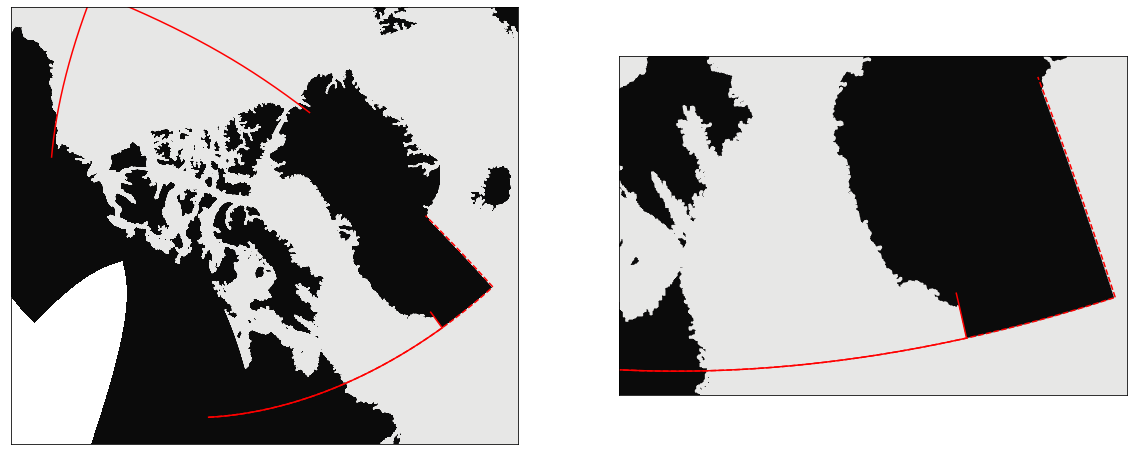

In [41]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

#--- full domain ----
proj1 = Basemap(projection='stere',lat_0 = 72, lon_0 = -75, resolution='i', width=5.1e6, height=4.4e6, ax=ax[0])
x_model, y_model = proj1(nav_lon, nav_lat)

proj1.contourf(x_model, y_model, tmask_read[:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj1.plot(x_model[1600:2180,799], y_model[1600:2180,799], '-r') # Northern Canada Basin
proj1.plot(x_model[2180,392:799] , y_model[2180,392:799] , '-r') # Western Canada Basin
proj1.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')  # Southeast Greenland 
proj1.plot(x_model[1100,202:680] , y_model[1100,202:680] ,'-r')  # Southern Baffin Bay
proj1.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r') # where the BC used to be
proj1.plot(x_model[1100,202:799] , y_model[1100,202:799] ,'--r') # where the BC used to be

#--- zoom -----------
proj2 = Basemap(projection='stere',lat_0 = 63, lon_0 = -50, resolution='i', width=2.1e6, height=1.4e6, ax=ax[1])
x_model, y_model = proj2(nav_lon, nav_lat)
proj2.contourf(x_model, y_model, tmask_read[:,:], cmap=cmocean.cm.gray)
# Boundaries:
proj2.plot(x_model[1100:1136,680], y_model[1100:1136,680],'-r')
proj2.plot(x_model[1100:1280,799], y_model[1100:1280,799],'--r')
proj2.plot(x_model[1100,202:680] , y_model[1100,202:680],'-r')
proj2.plot(x_model[1100,202:799] , y_model[1100,202:799],'--r')